# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [59]:
housing_df= pd.read_csv('data/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Finding and Removing Null Values

In [67]:
housing_df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [5]:
housing_df.dropna(inplace = True)

In [68]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [7]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [8]:
housing_df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

# Creating a new column with zipcodes

In [9]:
housing_df['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States      38
Delridge Way Southwest, Seattle, Washington 98106, United States                  24
9th Ave, Nebraska City, Nebraska 68410, United States                             21
South 35th Avenue, Bellevue, Nebraska 68123, United States                        20
15th Avenue, Plattsmouth, Nebraska 68048, United States                           17
                                                                                  ..
16510 39th Avenue Northeast, Lake Forest Park, Washington 98155, United States     1
6761 38th Avenue Southwest, Seattle, Washington 98126, United States               1
402 Orchard Avenue Northeast, North Bend, Washington 98045, United States          1
3800 Evanston Avenue North, Seattle, Washington 98103, United States               1
427 289th Place Northeast, Carnation, Washington 98014, United States              1
Name: address, Length: 29519, dtype: int64

In [10]:
housing_df['zipcode'] = housing_df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')
housing_df['zipcode'] = housing_df['zipcode'].astype(int)

In [11]:
housing_df = housing_df.drop(columns =['id', 'address', 'yr_renovated'], axis = 1 )

In [12]:
housing_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,zipcode
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,98055
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,98133
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,98178
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,98118
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,98103
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,98116
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,98122
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,98055


# Creating a new column based on condition values

In [13]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [14]:
housing_df["condition"] = housing_df["condition"].astype('category')
housing_df["condition"] = housing_df["condition"].cat.reorder_categories(
    ["Poor","Fair","Average","Good","Very Good"])

In [15]:
housing_df["condition_code"] = housing_df["condition"].cat.codes
housing_df["condition_code"].value_counts()

2    18515
3     8052
4     3258
1      225
0       61
Name: condition_code, dtype: int64

# Splitting string and numerical value form the grades column. Creating a new column with grades numerical value

In [16]:
housing_df["grade"].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [17]:
import string
housing_df["grade_str"] = housing_df["grade"].str.strip(string.digits)
housing_df["grade_str"] = housing_df["grade_str"].str.strip()

In [18]:
housing_df["grade_code"] = housing_df["grade_str"].astype('category')
categories = ['Substandard','Poor','Low','Fair','Low Average','Average','Good','Better',
             'Very Good','Excellent','Luxury','Mansion']
housing_df["grade_code"] = housing_df["grade_code"].cat.reorder_categories(categories)
housing_df["grade_code"] = housing_df["grade_code"].cat.codes
housing_df["grade_code"].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
2        46
11       24
1         9
0         1
Name: grade_code, dtype: int64

# Repeating steps above w/ view column

In [19]:
housing_df["view_code"] = housing_df["view"].astype('category')
categories2 = ["NONE","FAIR","AVERAGE","GOOD","EXCELLENT"]
housing_df["view_code"] = housing_df["view_code"].cat.reorder_categories(categories2)
housing_df["view_code"] = housing_df["view_code"].cat.codes
housing_df["view_code"].value_counts()

0    26555
2     1910
3      877
4      549
1      220
Name: view_code, dtype: int64

In [20]:
housing_df = housing_df.drop(columns = ["condition","grade","grade_str","waterfront","view", "sqft_basement", "long","lat"], axis=1)

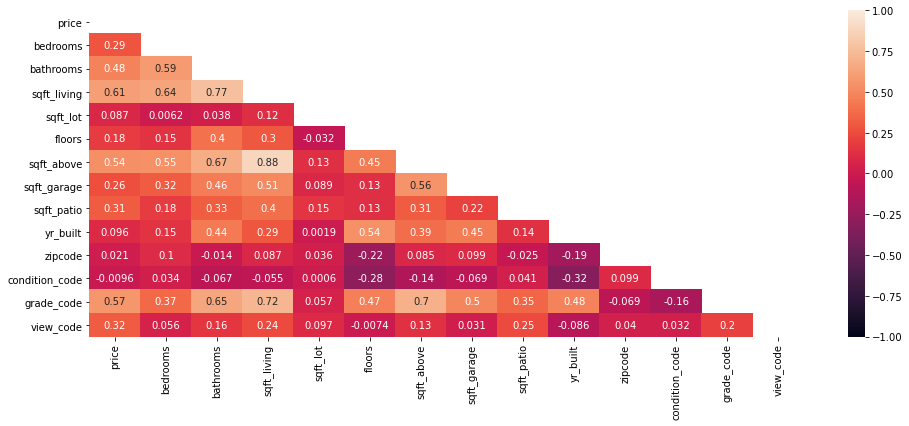

In [21]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

In [22]:
housing_df["price_per_sqft"] = housing_df["price"]/ housing_df["sqft_living"]
housing_df["price_per_sqft"] = housing_df["price"]/ housing_df["sqft_living"]

In [43]:
housing_df['house_age'] = pd.to_datetime(housing_df['date']).dt.year - housing_df['yr_built']
housing_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,heat_source,...,sqft_above,sqft_garage,sqft_patio,yr_built,zipcode,condition_code,grade_code,view_code,price_per_sqft,house_age
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,Gas,...,1180,0,40,1969,98055,3,5,0,572.033898,53
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,YES,Oil,...,1570,0,240,1950,98133,2,5,2,332.129964,71
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,Gas,...,1580,0,0,1956,98178,2,5,2,107.986111,65
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,Gas,...,1090,200,270,2010,98118,2,7,2,358.796296,11
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,YES,Electricity,...,1120,550,30,2012,98027,2,5,0,529.017857,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,Oil,...,1600,0,210,1921,98103,3,6,0,814.136126,100
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,Gas,...,2020,0,520,2011,98116,2,5,1,650.000000,10
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,YES,Gas,...,940,240,110,1995,98122,2,5,0,493.827160,27
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,Gas,...,1830,480,100,2006,98055,2,6,0,301.556420,16


In [44]:

numerical = ["price", "bedrooms", "bathrooms", "sqft_living", "floors", "sqft_above", "house_age", "price_per_sqft" ]

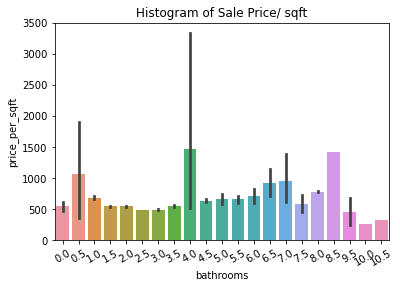

In [45]:
g = sns.barplot(data = housing_df,x = "bathrooms", y="price_per_sqft")
g.set(title="Histogram of Sale Price/ sqft")
plt.xticks(rotation=30)
plt.show()

In [46]:
print("Mean:", housing_df["price_per_sqft"].mean())
print("Median:", housing_df["price_per_sqft"].median())
print("Skewness:", housing_df["price_per_sqft"].skew())
print("Kurtosis:", housing_df["price_per_sqft"].kurtosis())

Mean: 561.0041903532566
Median: 492.04419889502765
Skewness: 169.4431163200357
Kurtosis: 29149.434780108808


In [27]:
### The distribution of SalePrice is skewed-right, the mean is greater than the median.
### The more skewed the data, the less accurate the prediction model will be.
### High kurtosis represents heavy tails meaning more outliers

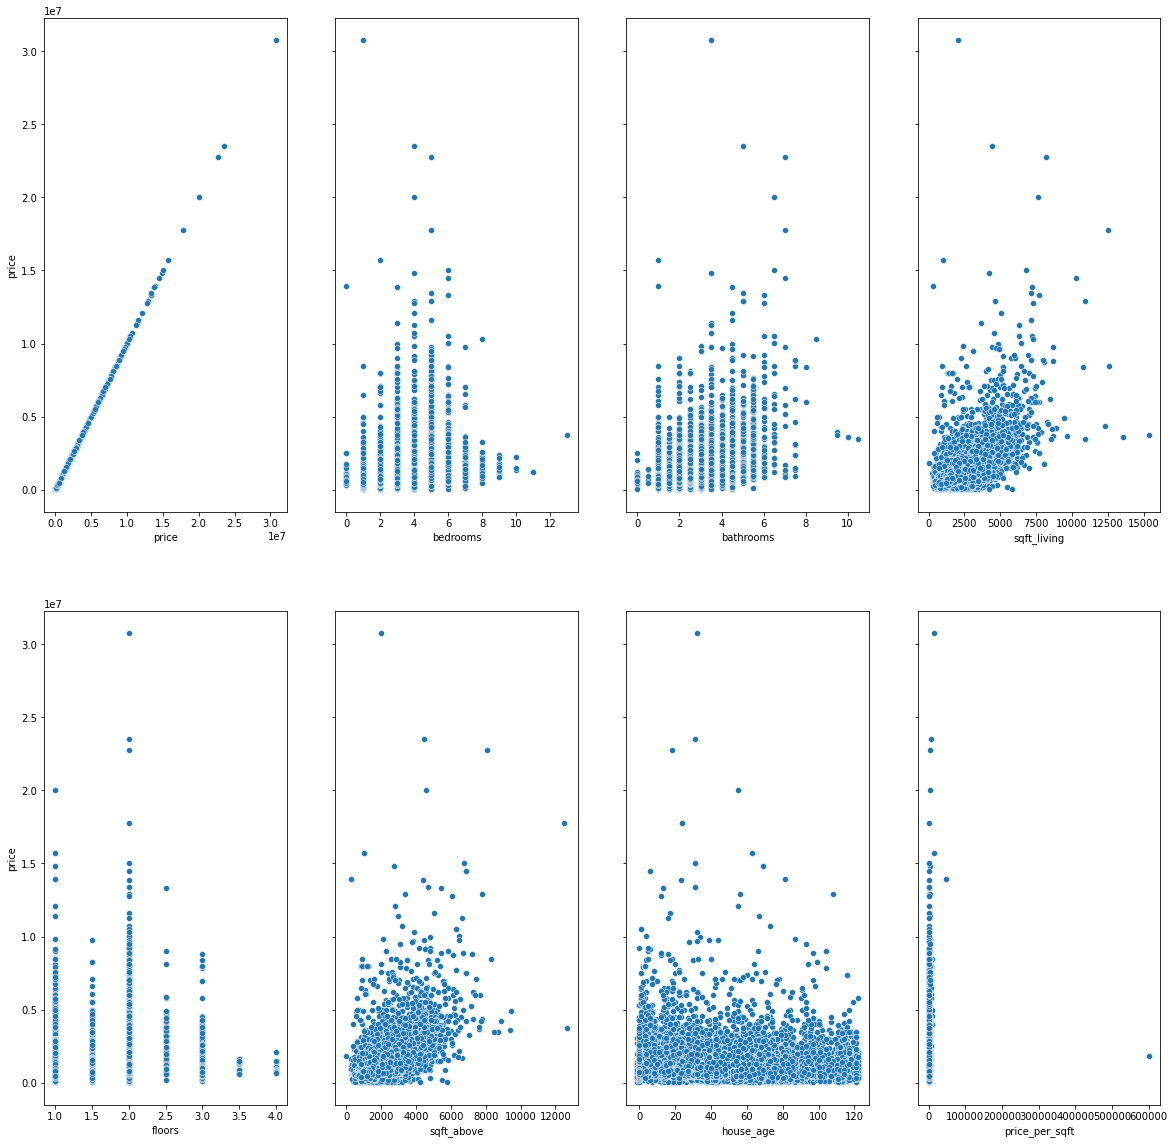

In [47]:
fig, axes = plt.subplots(2, 4, sharey=True, figsize=(20,20))
axes = np.ravel(axes)
for i in range(len(numerical)):
    sns.scatterplot(data=housing_df, x=numerical[i], y= "price", ax=axes[i])

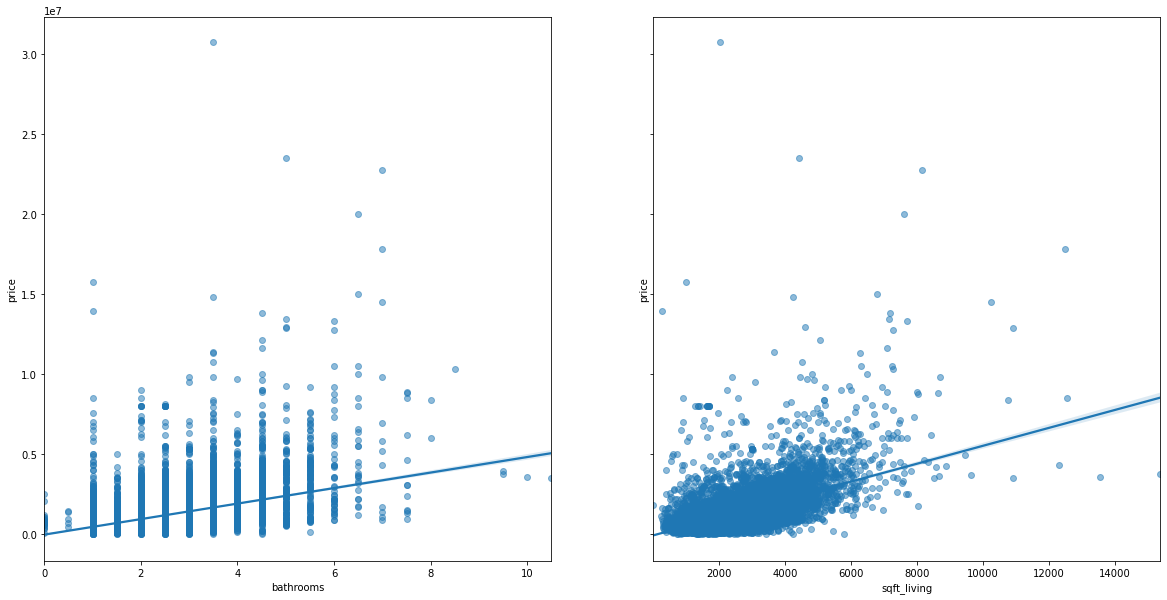

In [29]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
axes = np.ravel(axes)
sns.regplot(data=housing_df, x="bathrooms", y="price", ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=housing_df, x="sqft_living", y="price", ax=axes[1], scatter_kws={'alpha':0.5})
plt.show()

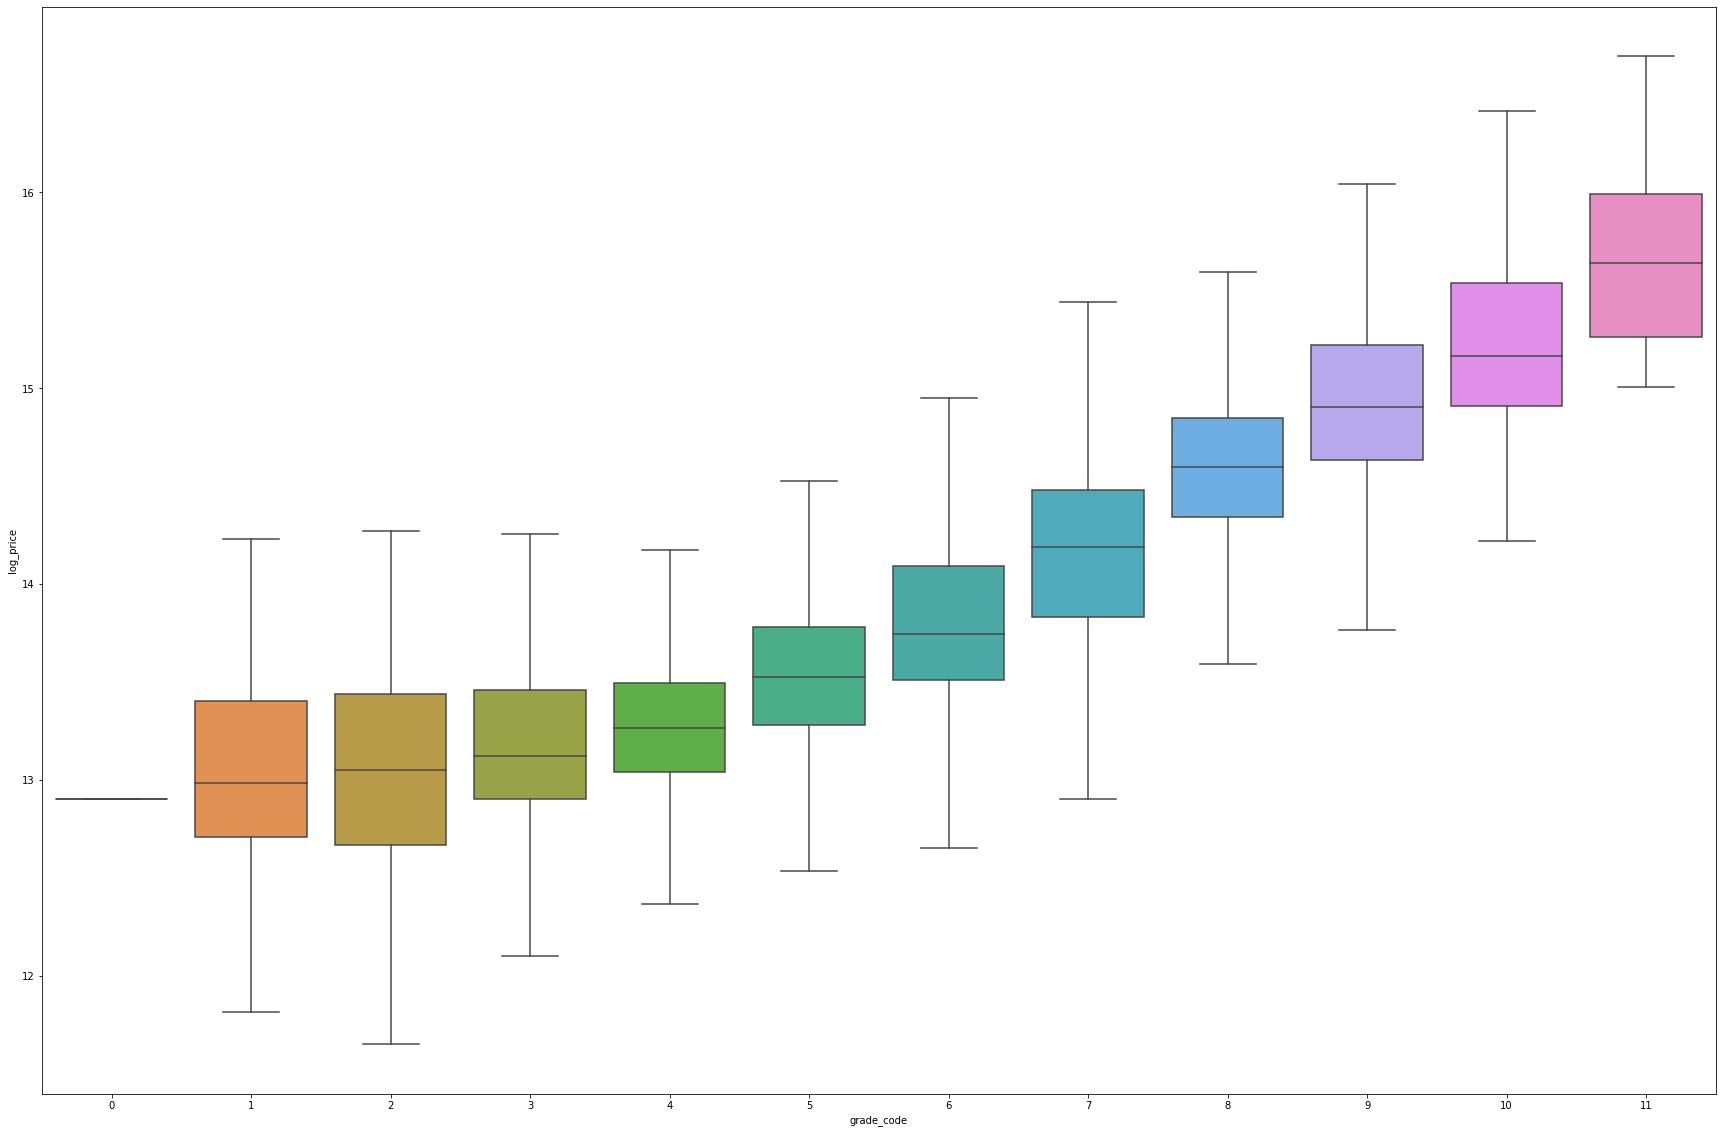

In [50]:
housing_df['log_price'] = np.log(housing_df['price'])
ordinal_features_to_plot = ["grade_code"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

In [51]:
housing_df["Date"] = pd.to_datetime(housing_df["date"]).dt.date

In [53]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,heat_source,...,sqft_patio,yr_built,zipcode,condition_code,grade_code,view_code,price_per_sqft,house_age,log_price,Date
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,Gas,...,40,1969,98055,3,5,0,572.033898,53,13.422468,2022-05-24
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,YES,Oil,...,240,1950,98133,2,5,2,332.129964,71,13.732129,2021-12-13
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,Gas,...,0,1956,98178,2,5,2,107.986111,65,12.647548,2021-09-29
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,Gas,...,270,2010,98118,2,7,2,358.796296,11,13.560618,2021-12-14
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,YES,Electricity,...,30,2012,98027,2,5,0,529.017857,9,13.292106,2021-08-24


In [54]:
housing_df['year_sold'] = pd.DatetimeIndex(housing_df['Date']).year

In [58]:
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,heat_source,sewer_system,...,sqft_patio,yr_built,zipcode,condition_code,grade_code,view_code,price_per_sqft,house_age,log_price,year_sold
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,Gas,PUBLIC,...,40,1969,98055,3,5,0,572.033898,53,13.422468,2022
1,920000.0,5,2.5,2770,6703,1.0,NO,YES,Oil,PUBLIC,...,240,1950,98133,2,5,2,332.129964,71,13.732129,2021
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,Gas,PUBLIC,...,0,1956,98178,2,5,2,107.986111,65,12.647548,2021
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,Gas,PUBLIC,...,270,2010,98118,2,7,2,358.796296,11,13.560618,2021
4,592500.0,2,2.0,1120,758,2.0,NO,YES,Electricity,PUBLIC,...,30,2012,98027,2,5,0,529.017857,9,13.292106,2021


In [56]:
housing_df = housing_df.drop(columns = ["Date", "date"])

In [57]:
housing_df['year_sold'].value_counts()

2021    19261
2022    10850
Name: year_sold, dtype: int64

<AxesSubplot:xlabel='year_sold', ylabel='price'>

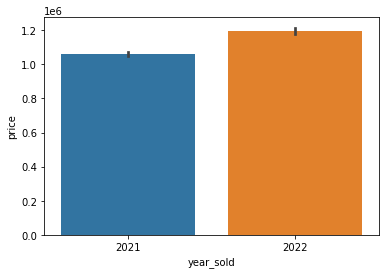

In [39]:
sns.barplot(data=housing_df, x="year_sold", y= "price")

In [40]:
housing_df.describe(include=[object])

,greenbelt,nuisance,heat_source,sewer_system
count,30111,30111,30111,30111
unique,2,2,7,4
top,NO,NO,Gas,PUBLIC
freq,29339,24862,20576,25767


In [41]:
housing_df.describe(include=[float])

,price,bathrooms,floors,price_per_sqft
count,3.011100e+04,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,2.335708,1.543506,561.004190
std,8.965158e+05,0.888293,0.567789,3488.578613
min,2.736000e+04,0.000000,1.000000,6.920415
25%,6.492360e+05,2.000000,1.000000,360.722440
50%,8.600000e+05,2.500000,1.500000,492.044199
75%,1.300000e+06,3.000000,2.000000,644.278799
max,3.075000e+07,10.500000,4.000000,601000.000000


In [42]:
housing_df.describe(include=[int])

,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_garage,sqft_patio,yr_built,zipcode,year_sold
count,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,3.415197,2113.342798,1.664880e+04,1810.389658,330.475308,217.451264,1975.162299,96718.496031,2021.360333
std,0.979755,973.453260,5.993303e+04,877.726339,285.725020,245.301991,32.052930,9125.895473,0.480105
min,0.000000,3.000000,4.020000e+02,2.000000,0.000000,0.000000,1900.000000,1541.000000,2021.000000
25%,3.000000,1420.000000,4.850000e+03,1180.000000,0.000000,40.000000,1953.000000,98030.000000,2021.000000
50%,3.000000,1920.000000,7.477000e+03,1560.000000,400.000000,150.000000,1977.000000,98059.000000,2021.000000
75%,4.000000,2620.000000,1.056800e+04,2270.000000,510.000000,320.000000,2003.000000,98117.000000,2022.000000
max,13.000000,15360.000000,3.253932e+06,12660.000000,3580.000000,4370.000000,2022.000000,99705.000000,2022.000000


In [43]:
housing_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_garage,sqft_patio,yr_built,zipcode,condition_code,grade_code,view_code,price_per_sqft,year_sold
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.263674,0.313789,0.095796,0.020959,-0.009599,0.566534,0.316283,0.069594,0.073904
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.318110,0.183660,0.145497,0.104390,0.033826,0.371866,0.055829,-0.016834,-0.027387
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.456264,0.327982,0.443379,-0.013518,-0.066610,0.647044,0.157019,0.002274,-0.042125
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.510967,0.396530,0.291242,0.087028,-0.055221,0.721615,0.243521,-0.022564,-0.029198
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.089318,0.154575,0.001897,0.036464,0.000599,0.057102,0.097283,0.035023,-0.004733
floors,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,0.132363,0.125016,0.544314,-0.220232,-0.282706,0.465100,-0.007421,0.001568,-0.017305
sqft_above,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,0.559972,0.312593,0.387253,0.084937,-0.137631,0.702825,0.133260,-0.020629,-0.023131
sqft_garage,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,1.000000,0.216512,0.447720,0.098574,-0.068650,0.497218,0.030500,-0.017446,-0.012821
sqft_patio,0.313789,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.216512,1.000000,0.138112,-0.025000,0.040922,0.351978,0.245416,-0.001425,-0.016531
yr_built,0.095796,0.145497,0.443379,0.291242,0.001897,0.544314,0.387253,0.447720,0.138112,1.000000,-0.193295,-0.320110,0.481924,-0.086386,-0.004864,-0.023375


In [52]:
housing_df = housing_df.loc[housing_df['grade_code'] != '12 Luxury']
housing_df = housing_df.loc[housing_df['grade_code'] != '13 Mansion']


In [54]:
housing_df['grade_code'].unique()

array([ 5,  7,  6,  4,  8,  3,  9, 10,  2, 11,  1,  0], dtype=int8)

<AxesSubplot:xlabel='grade_code', ylabel='price'>

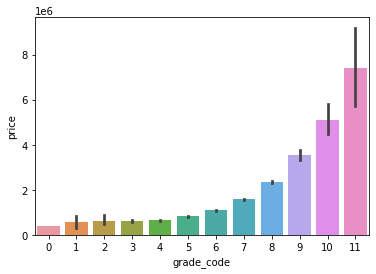

In [55]:
sns.barplot(data = housing_df, x = "grade_code", y = "price")